### Lecture 3: Hinge loss, margin boundaries, and regularization
- what is hing loss ?
    - it is a loss function that penalizes the difference between the prediction and the target use for binary classification.

    ![hing loss](./assets/hingel-loss.png)
- what is margin boundaries ?
    - it is the distance between the prediction and the target.
    
    ![margin boundaries](./assets/margin_boundaries.png)

- what is regularization ?
    - Regularization is a technique used to reduce the errors by fitting the function appropriately on the given training set and avoid overfitting.

    ![Regularization](./assets/regularization.png)
    - The commonly used regularization techniques are :
        - L1 regularization.
        - L2 regularization.
        - Dropout regularization.

In [177]:
# i will trying to undertand the margin boundaries and regularization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [178]:
# read from txt file 
df = pd.read_csv('../../dataset/brain_body_one.txt', delim_whitespace=True  , names=['Brain', 'Body'])
df.values[:5,:]


array([[  3.385,  44.5  ],
       [  0.48 ,  15.5  ],
       [  1.35 ,   8.1  ],
       [465.   , 423.   ],
       [ 36.33 , 119.5  ]])

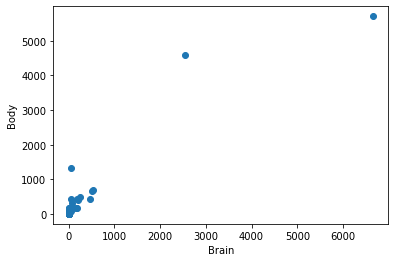

In [179]:
# draw scatter plot
plt.scatter(df.Brain, df.Body)
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()

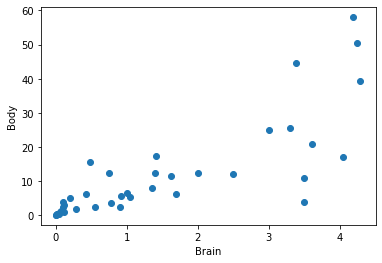

In [180]:
# remove outliers
df = df[(df.Brain < 15) & (df.Body < 60)]
# draw scatter plot
plt.scatter(df.Brain, df.Body)
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()


In [181]:
Xs = df.Brain.values
ys = df.Body.values
# split into train and test
Xs_train = Xs[:-20]
ys_train = ys[:-20]
Xs_test = Xs[-20:]
ys_test = ys[-20:]

In [182]:
# linear regression 
def linear_regression(Xs, ys):
    # calculate the mean of Xs and ys
    mean_Xs = np.mean(Xs)
    mean_ys = np.mean(ys)
    # calculate the slope and intercept
    slope = np.sum((Xs - mean_Xs) * (ys - mean_ys)) / np.sum((Xs - mean_Xs) ** 2)
    intercept = mean_ys - slope * mean_Xs
    return slope, intercept

def predict(Xs, slope, intercept):
    return slope * Xs + intercept
slop , intercept = linear_regression(Xs_train, ys_train)
Yt = predict(Xs_test, slop, intercept)
print(Yt)

[ 6.72683032 32.49748722 37.6516186   0.8230071  -0.08599425 -0.20781917
 12.8180765  23.12633925  4.85260073 33.43460201 39.88195181  2.32239078
  0.40130545  0.8417494   0.14828445 27.81191324  8.13250251 14.87972905
  0.67306874 39.38528097]


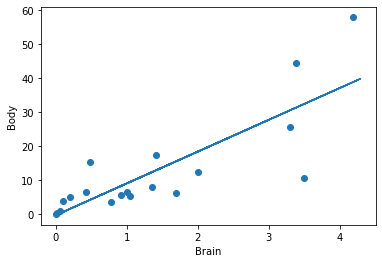

In [183]:
# draw scatter plot for training data set and line for Yt
plt.scatter(Xs_train, ys_train)
plt.plot(Xs_test, Yt)
plt.xlabel('Brain')
plt.ylabel('Body')
plt.show()


In [184]:
# r2 score
def r2_score(ys_test, Yt):
    return 1 - np.sum((ys_test - Yt) ** 2) / np.sum((ys_test - np.mean(ys_test)) ** 2)
r2_score(ys_test, Yt)
r21 =r2_score(ys_test, Yt)
print(r2)

0.5217051203887626


#### Hing Loss
The second most common loss function used for Classification problems and an alternative to Cross-Entropy loss function is Hinge Loss, primarily developed for Support Vector Machine (SVM) model evaluation.

$L = \sum_{i=1}^{n} \max(0, 1 - y_i \cdot \hat{y}_i)$

In [185]:
# hing loss
def hinge_loss(ys_test, Yt):
    return np.sum(np.maximum(0, 1 - (ys_test * Yt))) / len(ys_test)
hl = hinge_loss(ys_test, Yt)
print(hl)

0.18664224931846518


#### Regularization

are techniques that seek to reduce overfitting (i.e., reduce generalization errors) by keeping network weights small. There are three very popular and efficient regularization techniques called L1, L2, and dropout.

- L1 regularization.
    In the case of L1 regularization (also knows as Lasso regression), we simply use another regularization term, Ω. This term is the sum of the absolute values of the weight parameters in a weight matrix. L1 encourages weights to 0.0 (if possible), which results in more sparse weights (more weights with values equal to 0.0). Hence, the cost function in L1 becomes:
    
    $L = \sum_{i=1}^{n} \max(0, 1 - y_i \cdot \hat{y}_i) + \sum_{i=1}^{n} \|w_i\|$

- L2 regularization.
    L2 regularization offers more nuance by penalizing larger weights more severely, thus resulting in weights that are less sparse. The regularization term (Ω) is defined as the Euclidean Norm (or L2 norm) of the weight matrices and is the sum over all squared weight values of a weight matrix. The cost function in L2 becomes:

    $L = \sum_{i=1}^{n} \max(0, 1 - y_i \cdot \hat{y}_i) + \sum_{i=1}^{n} \|w_i\|^2$
- Dropout regularization.
    Dropout regularization involves a neuron of the neural network getting turned off during training with a probability of P. This results in a simpler neural network since some neurons are not active at all.

    A simpler version of the neural network results in less complexity, which can reduce overfitting. The deactivation of neurons with a certain probability (P) is applied at each forward propagation and weight update step.

In [190]:
# Regularization 
def regularization(Xs, ys, l):
    # calculate the mean of Xs and ys
    mean_Xs = np.mean(Xs)
    mean_ys = np.mean(ys)
    # calculate the slope and intercept
    slope = np.sum((Xs - mean_Xs) * (ys - mean_ys)) / np.sum((Xs - mean_Xs) ** 2)
    intercept = mean_ys - slope * mean_Xs
    # calculate the regularization
    regularization = l * slope
    return slope, intercept, regularization
slope, intercept, regularization_v = regularization(Xs_train, ys_train, 0.5)
print(slope, intercept, regularization_v)

9.371147962761862 -0.30153065202633833 4.685573981380931
